(372, 650)


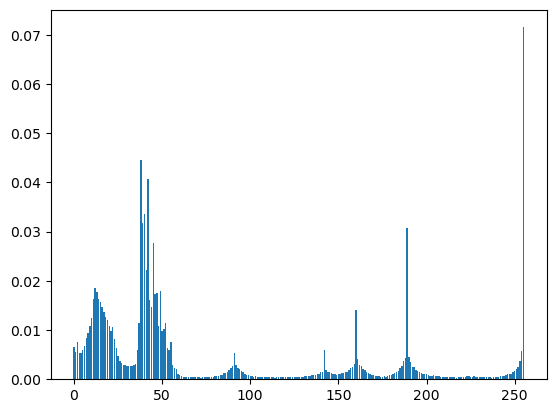

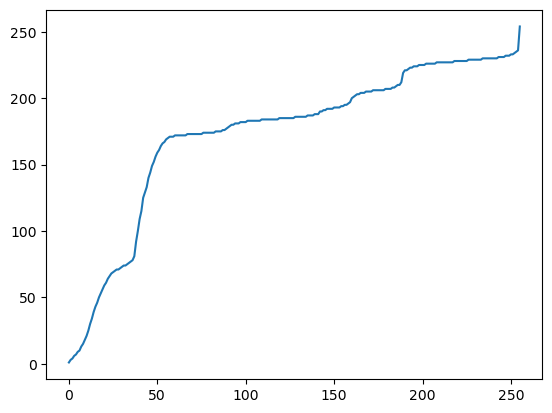

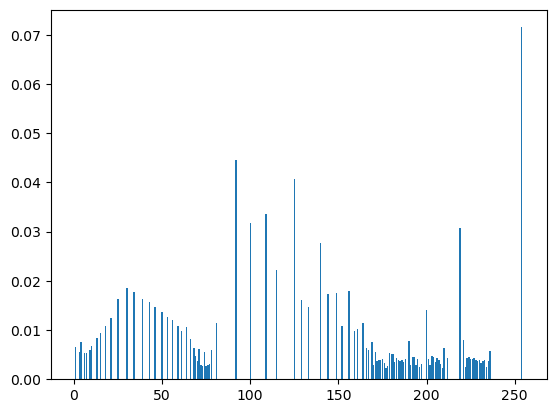

In [42]:
# 灰階圖片影像增強


# 主要概念 : 

# 1. 將影像的強度分配 0 ~ 255 平均化，如此來將原本集中顏色而對比偏低的強度打散，增加對比度

# 2. 如果偏暗的分配就往 255 打散調亮，如果偏亮的分配就往 0 打散調暗，如果在中間就往兩側打散

# 3. 基本上就是畫圖就可以理解，x 軸是原本強度，y 軸是新的強度，x 軸集中的地方就在 y 軸拉開對應，這樣就可以平均化


import cv2
import os
import numpy
import matplotlib.pyplot as plt


# 1. 一樣讀取影片，但第二個參數設定為 0 ，變成灰階

my_image_gray = cv2.imread("image/Haku.jpg",0)

# 可以發現矩陣變成 2D 而已，因為是灰階，沒有 BGR

print(numpy.shape(my_image_gray))


# 2. 將矩陣依照 Equalization 的演算法轉換強度值

# a. 先做出原強度的機率陣列和機率分配圖

hist_list = numpy.zeros(256)

row = numpy.shape(my_image_gray)[0]

column = numpy.shape(my_image_gray)[1]

# 利用迴圈讀取每個元素，如果是某個強度，就在那個強度位置 + 1

for r in range(row) : 

    for c in range(column) : 

        value = my_image_gray[r,c]

        hist_list[value] = hist_list[value] + 1

# 最後除以總像素數量變成機率

hist_list = hist_list / ( row * column )

plt.bar(range(256),hist_list)

plt.show()

# b. 做出新強度陣列，將每個強度的累計機率乘上 ( 總強度數量 - 1 ) 並取四捨五入 ( 或無條件捨去或無條件進位 )

transform_list = numpy.zeros(256)

total = 0

# 用迴圈累加機率，並計算各強度的新強度值

for i in range(256) : 

    total = total + hist_list[i]

    # round ( , 0) 是四捨五入，int() 是無條件捨去

    transform_list[i] = numpy.int16(255 * total)

# 畫出轉換曲線

plt.plot(range(256),transform_list)

plt.show()

# c. 用轉換陣列做出新的圖，並畫出新的分配直方圖

# 做出新的圖

# 這邊 numpy.zero 也可以用 numpy.zero( , , numpy.int or numpy.float) 來設定

my_image_gray_2 = numpy.zeros((row,column))

for r in range(row) : 

    for c in range(column) : 

        value = my_image_gray[r,c]

        my_image_gray_2[r,c] = transform_list[value]

# 算出新的機率分配直方圖，跟前面一樣方法再做一次

hist_list_2 = numpy.zeros(256)

for r in range(row) : 

    for c in range(column) : 

        # 要注意這邊因為 value 要當 index , 所以一定要確定值是整數

        # 基本上 array 沒有預設數字是 int 或 float , 除非自己設定或轉型才會變成那一個設定

        value = int(my_image_gray_2[r,c])

        hist_list_2[value] = hist_list_2[value] + 1

hist_list_2 = hist_list_2 / ( row * column )

plt.bar(range(256),hist_list_2)

plt.show()



(372, 650, 3)


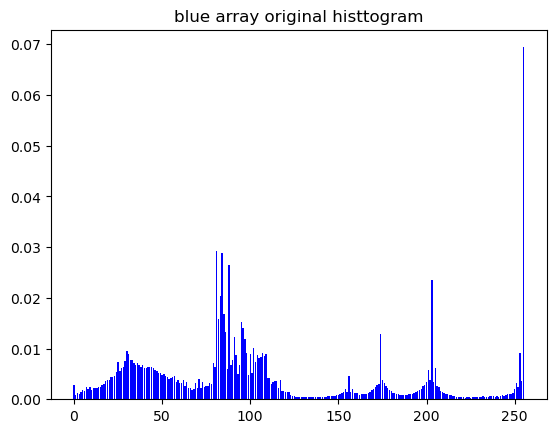

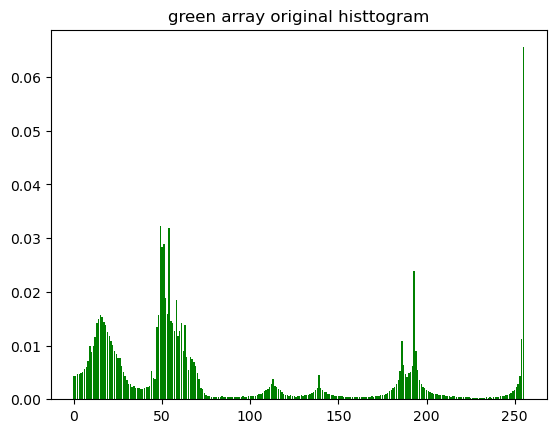

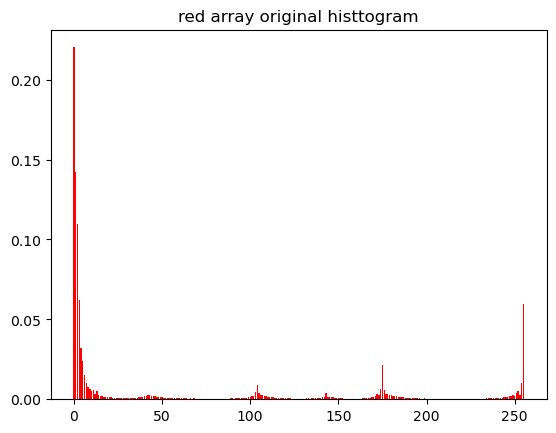

(372, 650, 3)


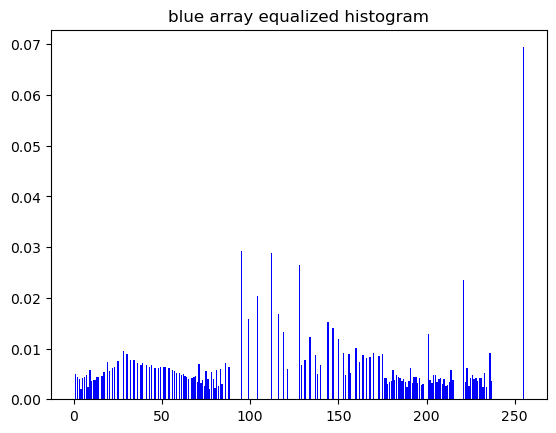

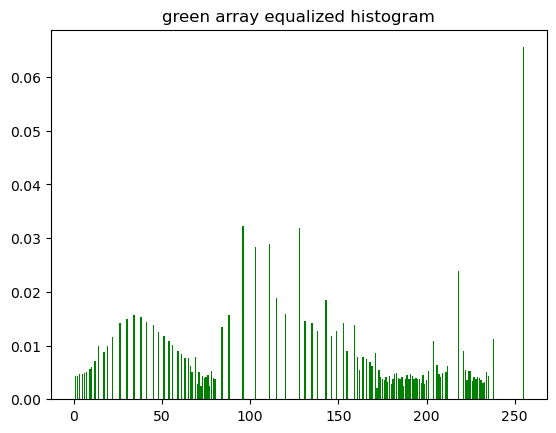

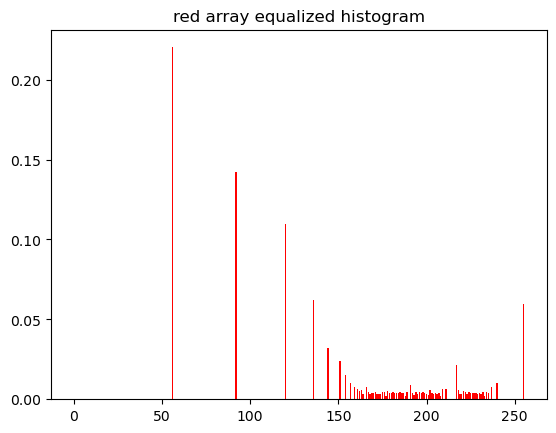

In [43]:
# 彩色圖片影像強化


# 這邊是直接把 Equalization 使用在彩色影像的 BGR 強度上

# 但是實際上要考慮三個顏色各自原本的比重，或者說原來圖片的特性，不然直接均化各個顏色會使多的變少，少的變多，原來色調會失調


import cv2
import numpy
import matplotlib.pyplot as plt


# 1. 載入影像並區分出不同顏色的矩陣

my_image = cv2.imread("image/Haku.jpg")

print(numpy.shape(my_image))

# 這邊 3D 矩陣可以用切片的方式，指定最後一個維度為某一數值，達到直接選取該維度某一列，

# 基本上就像 2D 的情況，例如 [:,1]，前面都是全選，後面指定某一個數值來達到選取某一特定行或列

# 基本上下面就變成 n * m 的 2D 矩陣 ( 或說 n * m * 1 )，原本 3D 的 n * m 的每一個元素 list 變成剩單一數值元素

Blue_array = my_image[:,:,0]
Green_array = my_image[:,:,1]
Red_array = my_image[:,:,2]

row = numpy.shape(Blue_array)[0]
column = numpy.shape(Blue_array)[1]

# 2. 畫出原來陣列的強度分配圖

hist_list = numpy.zeros(256)

for array in [(Blue_array,"blue") , (Green_array,"green") , (Red_array,"red")] : 

    for i in range(256) : 

        hist_list[i] = numpy.sum(array[0] == i)

    hist_list = hist_list / array[0].size

    plt.bar(range(256),hist_list,color=array[1])

    plt.title(f"{array[1]} array original histtogram".replace("_"," "),fontsize=12)

    plt.show()

# 3. 每一個顏色的矩陣都做轉換

# 藍色的陣列轉換

Blue_array_2 = numpy.copy(Blue_array)

# 這邊做法是利用布林陣列，是對整個矩陣做布林值，把符合的數值位置留下來，並指派 ( 總強度數量 - 1 ) * ( 各數值在原影像裡的累加總數 / 像素總數 )

total = 0

for i in range(256) : 

    total = total + numpy.sum(Blue_array == i)

    Blue_array_2[Blue_array == i] = round(255 * total / Blue_array.size,ndigits=0)


# 綠色的陣列轉換

Green_array_2 = numpy.copy(Green_array)

total = 0

for i in range(256) : 

    total = total + numpy.sum(Green_array == i)

    Green_array_2[Green_array == i] = round(255 * total / Green_array.size,ndigits=0)

# 紅色的陣列轉換

Red_array_2 = numpy.copy(Red_array)

total = 0

for i in range(256) : 

    total = total + numpy.sum(Red_array == i)

    Red_array_2[Red_array == i] = round(255 * total / Red_array.size,ndigits=0)


# 4. 最後把所有陣列再合併起來，變回原來的圖形矩陣

# 基本上就是把原本的陣列切片指派為轉圜過後的陣列而已

my_image_2 = numpy.copy(my_image)

my_image_2[:,:,0] = Blue_array_2
my_image_2[:,:,1] = Green_array_2
my_image_2[:,:,2] = Red_array_2

print(numpy.shape(my_image_2))


# 5. 畫出所有轉換後陣列的直方圖

hist_list_2 = numpy.zeros(256)

for array in [(Blue_array_2,"blue"),(Green_array_2,"green"),(Red_array_2,"red")] : 

    for i in range(256) : 

        hist_list_2[i] = numpy.sum(array[0] == i)

    hist_list_2 = hist_list_2 / array[0].size

    plt.bar(range(256),hist_list_2,color=array[1])

    plt.title(f"{array[1]} array equalized histogram",fontsize=12)

    plt.show()
